In [623]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [624]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [625]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [626]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [627]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [628]:
#independent and dependent variables
x = df.drop('FWI', axis = 1)
y = df['FWI']

In [629]:
print(x.shape)
print(y.shape)

(243, 11)
(243,)


In [630]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [631]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


<Axes: >

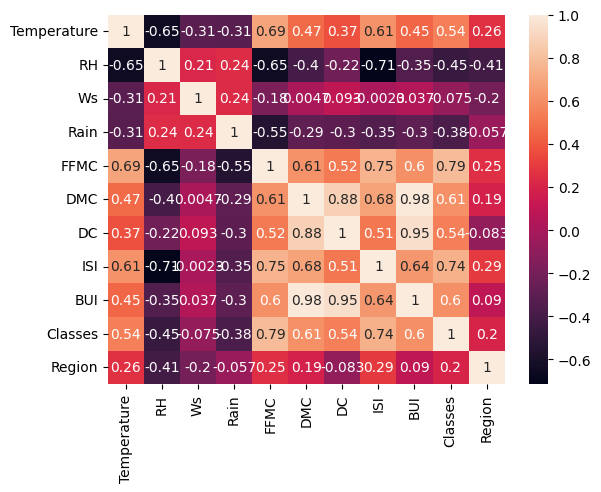

In [632]:
sns.heatmap(x_train.corr(), annot = True)

In [633]:
def correlate_features(data, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [634]:
corr = correlate_features(x_train,0.85)

In [635]:
corr

{'BUI', 'DC'}

In [636]:
x_train.drop(corr, axis =1 , inplace = True)
x_test.drop(corr, axis =1 , inplace = True)

### Standardization

In [637]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Linear Regression Model

<Axes: xlabel='FWI'>

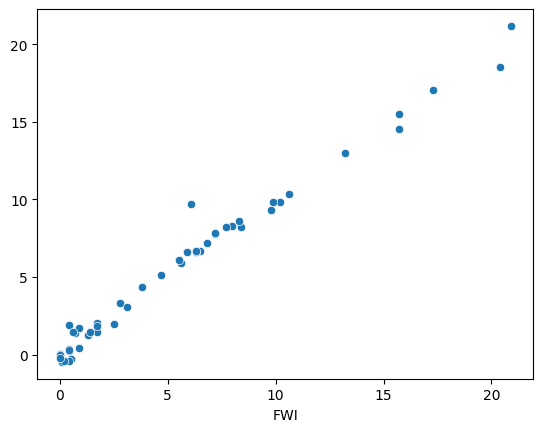

In [638]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(n_jobs = -1)
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
reg.fit(x_train_scaled,y_train)
y_pred = reg.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
sns.scatterplot(x = y_test, y = y_pred) 

In [639]:
print("RMSE:", rmse)
print("MSE: ", mse)
print("MAE:", mae)
print("R2 Score:", score)


RMSE: 0.7670065260940517
MSE:  0.5882990110708652
MAE: 0.5049978694165659
R2 Score: 0.9805895859259883


RMSE: 0.7765060251246373
MSE:  0.6029616070548639
MAE: 0.5192048325844796
R2 Score: 0.9801058063273599


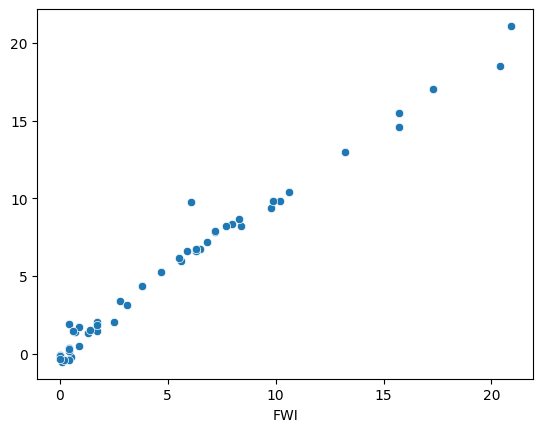

In [640]:
from sklearn.linear_model import Ridge
rid = Ridge()
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
rid.fit(x_train_scaled,y_train)
y_pred = rid.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
sns.scatterplot(x = y_test, y = y_pred) 
print("RMSE:", rmse)
print("MSE: ", mse)
print("MAE:", mae)
print("R2 Score:", score)


RMSE: 1.3137893000870198
MSE:  1.7260423250231411
MAE: 1.0093958923873405
R2 Score: 0.9430507350726564


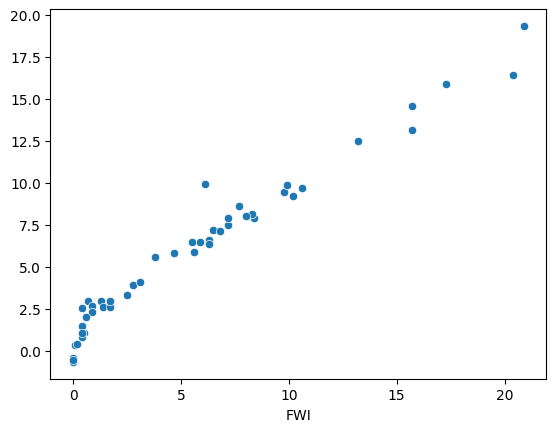

In [641]:
from sklearn.linear_model import Lasso
lasso = Lasso()
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
lasso.fit(x_train_scaled,y_train)
y_pred = lasso.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
sns.scatterplot(x = y_test, y = y_pred) 
print("RMSE:", rmse)
print("MSE: ", mse)
print("MAE:", mae)
print("R2 Score:", score)


RMSE: 2.0024787885121285
MSE:  4.009921298441002
MAE: 1.6834416340136709
R2 Score: 0.8676961352267807


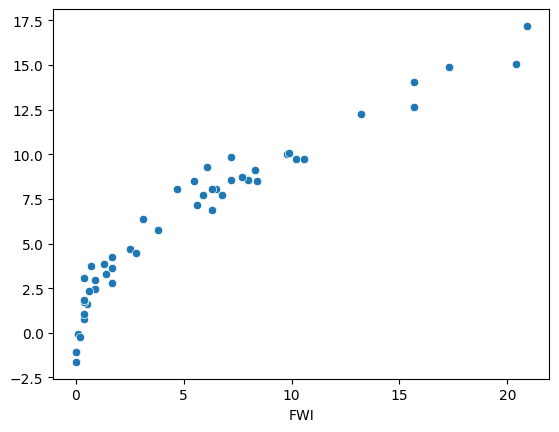

In [642]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
elastic.fit(x_train_scaled,y_train)
y_pred = elastic.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
sns.scatterplot(x = y_test, y = y_pred) 
print("RMSE:", rmse)
print("MSE: ", mse)
print("MAE:", mae)
print("R2 Score:", score)


### Cross Validation Lasso

In [643]:
from sklearn.linear_model import LassoCV
lasscv = LassoCV(cv = 3)
lasscv.fit(x_train_scaled, y_train)
y_pred = lasscv.predict(x_test_scaled)    

In [644]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MSE: ", mse)
print("MAE:", mae)
print("R2 Score:", score)

RMSE: 0.8104548121965427
MSE:  0.6568370026125333
MAE: 0.5556715031617874
R2 Score: 0.978328234520343


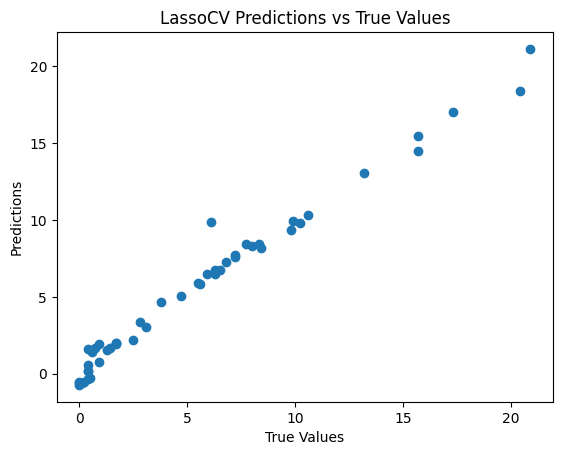

In [645]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('LassoCV Predictions vs True Values')
plt.show()

## Sample Data For Predicting The Model's Accuracy

In [646]:
sample_data = {
    'Temperature': [32.5, 28.3, 35.7, 30.2, 26.8, 33.1, 36.9, 29.4, 31.5, 34.2],
    'RH': [27, 65, 15, 32, 75, 21, 12, 42, 30, 18],
    'Ws': [9, 3, 12, 6, 2, 8, 14, 5, 7, 11],
    'Rain': [0.0, 0.6, 0.0, 0.0, 1.2, 0.0, 0.0, 0.3, 0.0, 0.0],
    'FFMC': [91.2, 68.5, 94.8, 88.3, 65.7, 92.5, 95.9, 78.4, 89.7, 93.2],
    'DMC': [142.6, 65.3, 167.8, 120.5, 45.2, 150.7, 178.3, 95.6, 130.4, 160.9],
    'DC': [684.3, 315.7, 752.1, 562.8, 210.4, 695.6, 810.3, 420.5, 605.2, 725.8],
    'ISI': [15.8, 3.2, 20.5, 10.7, 1.8, 14.3, 25.6, 5.4, 12.6, 18.9],
    'BUI': [130.5, 62.4, 152.6, 115.2, 40.8, 138.9, 165.7, 90.3, 125.8, 148.2],
    'FWI': [45.3, 8.7, 63.2, 28.5, 3.4, 40.2, 74.8, 14.6, 35.7, 55.1],
    'Classes': [1, 0, 1, 0, 0, 1, 1, 0, 0, 1]  # 1 for fire, 0 for no fire
}

In [647]:
df  = pd.DataFrame(sample_data)

In [648]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32.5,27,9,0.0,91.2,142.6,684.3,15.8,130.5,45.3,1
1,28.3,65,3,0.6,68.5,65.3,315.7,3.2,62.4,8.7,0
2,35.7,15,12,0.0,94.8,167.8,752.1,20.5,152.6,63.2,1
3,30.2,32,6,0.0,88.3,120.5,562.8,10.7,115.2,28.5,0
4,26.8,75,2,1.2,65.7,45.2,210.4,1.8,40.8,3.4,0


In [649]:
t = df.drop('FWI', axis = 1)
s = ['FWI']


In [650]:
def correlate_features(data, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [651]:
corr = correlate_features(t,0.85)

In [652]:
t.drop(corr, axis =1 , inplace = True)


In [653]:
t = scaler.fit_transform(t)

In [654]:
# Ensure the target variable has the same number of samples as the input
s = df['FWI']  # Update s to be the 'FWI' column from the DataFrame
elastic.fit(t, s)

ElasticNet()

In [655]:
pred = elastic.predict(t)

In [656]:
score = r2_score(s, pred)

In [657]:
score

0.8606375060437086